# Data Analysis

Determine ways to improve seat occupancy

In [5]:
!pip3 install matplotlib
!pip3 install pandas

  Using cached matplotlib-3.7.1-cp39-cp39-macosx_11_0_arm64.whl (7.3 MB)
  Using cached contourpy-1.0.7-cp39-cp39-macosx_11_0_arm64.whl (229 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.39.4-py3-none-any.whl (1.0 MB)
  Using cached kiwisolver-1.4.4-cp39-cp39-macosx_11_0_arm64.whl (63 kB)
  Using cached Pillow-9.5.0-cp39-cp39-macosx_11_0_arm64.whl (3.1 MB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached importlib_resources-5.12.0-py3-none-any.whl (36 kB)


In [8]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import s3fs
warnings.filterwarnings('ignore')

In [14]:
df = pd.read_csv('data/T_T100D_MARKET_US_CARRIER_ONLY.csv')
df.columns


Index(['UNIQUE_CARRIER', 'UNIQUE_CARRIER_NAME', 'ORIGIN_AIRPORT_ID', 'ORIGIN',
       'DEST_AIRPORT_ID', 'DEST', 'MONTH'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20823 entries, 0 to 20822
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   UNIQUE_CARRIER       20823 non-null  object
 1   UNIQUE_CARRIER_NAME  20823 non-null  object
 2   ORIGIN_AIRPORT_ID    20823 non-null  int64 
 3   ORIGIN               20823 non-null  object
 4   DEST_AIRPORT_ID      20823 non-null  int64 
 5   DEST                 20823 non-null  object
 6   MONTH                20823 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 1.1+ MB


In [17]:
df.describe(include='object')

,UNIQUE_CARRIER,UNIQUE_CARRIER_NAME,ORIGIN,DEST
count,20823,20823,20823,20823
unique,99,99,798,811
top,WN,Southwest Airlines Co.,ORD,ORD
freq,3817,3817,575,564


In [50]:
flight_counts = df.groupby('UNIQUE_CARRIER')[['MONTH']].count()
flight_counts.rename(columns={'MONTH':'FLIGHT_COUNT'}, inplace=True)
flight_counts

# pd.DataFrame(carriers, columns=['Unique Carrier'])

,FLIGHT_COUNT
UNIQUE_CARRIER,
04Q,134
09Q,539
1BQ,8
1EQ,13
1QQ,2
...,...
YR,9
YV,305
YX,579


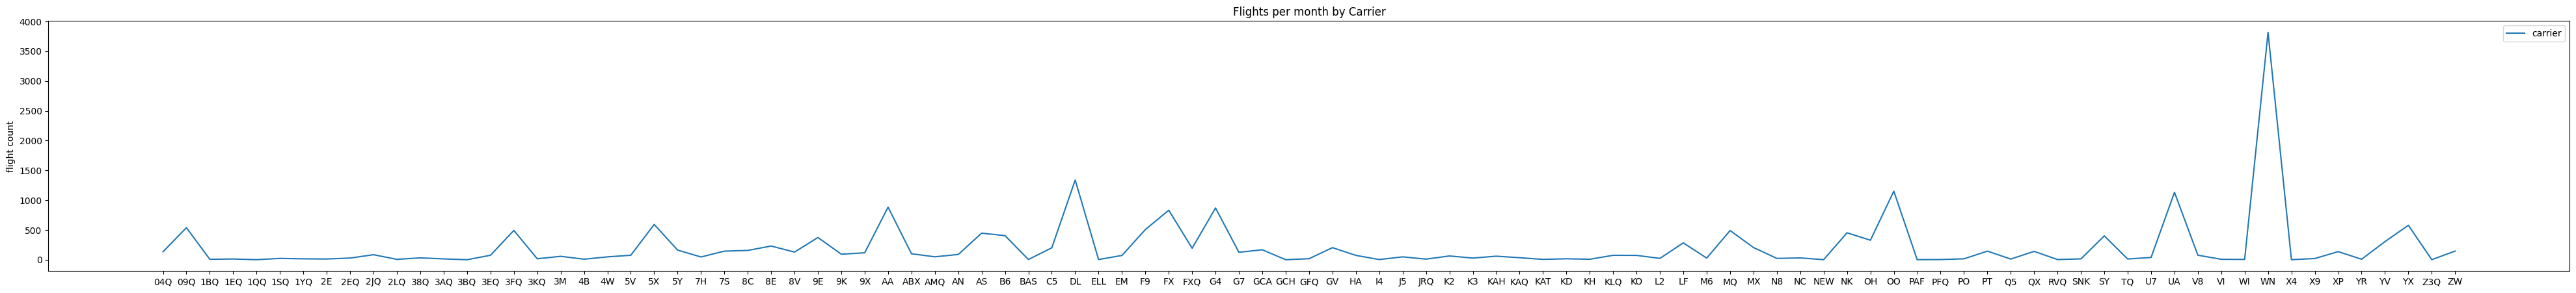

In [58]:
plt.figure(figsize=(50,5))
plt.title('Flights per month by Carrier')
plt.plot(flight_counts.index, flight_counts['FLIGHT_COUNT'], label = 'carrier')
plt.ylabel('flight count')
plt.legend()

In [91]:
max_flights = flight_counts[flight_counts['FLIGHT_COUNT'] == flight_counts['FLIGHT_COUNT'].max()].index[0]
# The .index[0] returns the index (carrier) associated with that row.

unique_carrier_name = df['UNIQUE_CARRIER_NAME'][df['UNIQUE_CARRIER'] == max_flights].unique()
# print(unique_carrier_name)
max_flights

'WN'

top destination

In [104]:
flight_destinations = df.groupby('DEST')[['MONTH']].count()
flight_destinations.rename(columns={'MONTH':'FLIGHT_COUNT'}, inplace=True)
flight_destinations

,FLIGHT_COUNT
DEST,
1AK,3
1G4,2
2VA,1
7AK,3
A1K,1
...,...
XXP,1
YAK,6
YIP,38


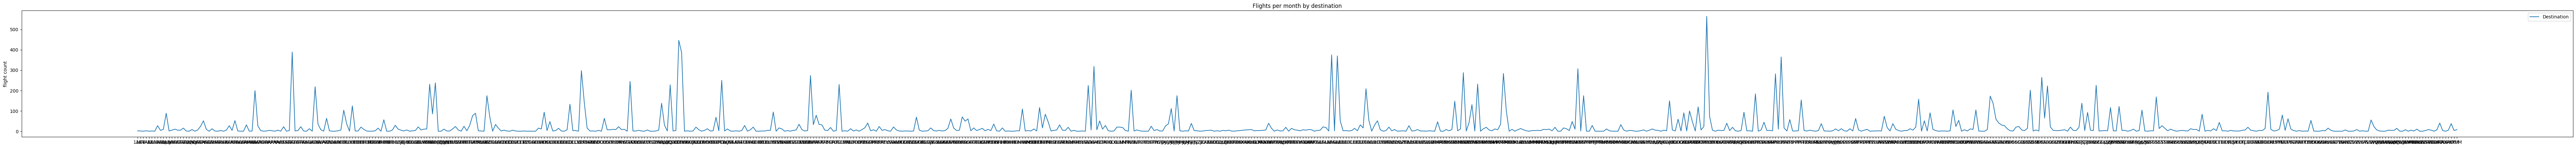

In [107]:
plt.figure(figsize=(100,5))
plt.title('Flights per month by destination')
plt.plot(flight_destinations.index, flight_destinations['FLIGHT_COUNT'], label = 'Destination')
plt.ylabel('flight count')
plt.legend()

In [110]:
popular_destination = flight_destinations[flight_destinations['FLIGHT_COUNT'] == flight_destinations['FLIGHT_COUNT'].max()].index[0]
popular_destination

'ORD'

In [112]:
con = sqlite3.connect("data/flights.db")
curr = con.cursor()

In [114]:
# con.execute('''create table if not exists flights(
#                 'UNIQUE_CARRIER' int, 
#                 'UNIQUE_CARRIER_NAME' varchar(20), 
#                 'ORIGIN_AIRPORT_ID' int, 
#                 'ORIGIN' varchar(20),
#                 'DEST_AIRPORT_ID' int, 
#                 'DEST' varchar(20), 
#                 'MONTH int'
#                 )''')

In [121]:
df.to_sql('flights', con, if_exists='replace', index=False)
# pd.read_sql('select * from new_table_name', conn)


# alternative option would be to insert into VALUES(???)

20823

In [122]:
sql_data = pd.read_sql('select * from flights', con)

In [123]:
sql_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20823 entries, 0 to 20822
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   UNIQUE_CARRIER       20823 non-null  object
 1   UNIQUE_CARRIER_NAME  20823 non-null  object
 2   ORIGIN_AIRPORT_ID    20823 non-null  int64 
 3   ORIGIN               20823 non-null  object
 4   DEST_AIRPORT_ID      20823 non-null  int64 
 5   DEST                 20823 non-null  object
 6   MONTH                20823 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 1.1+ MB


In [124]:
con.close()